In [14]:

import tensorflow as tf
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [15]:

#define the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10),
    keras.layers.Softmax()
])


In [16]:
# compile the keras model
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [17]:
#Extract the MNIST images and labels
(x_train, y_train), (x_test, y_test) = mnist.load_data()

img_rows, img_cols, channels = 28, 28, 1
num_classes = 10

x_train = x_train / 255
x_test = x_test / 255

print("Data shapes", x_test.shape, y_test.shape, x_train.shape, y_train.shape)


Data shapes (10000, 28, 28) (10000,) (60000, 28, 28) (60000,)


In [18]:
# fit the keras model on the dataset
model.fit(x_train, y_train,
          batch_size=32,
          epochs=5,
          validation_data=(x_test, y_test))

# evaluate the keras model
train_loss, train_acc = model.evaluate(x_train,  y_train, verbose=2)
# evaluate the keras model
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTrain accuracy:', train_acc)
print('\nTest accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5696 - accuracy: 0.9071 - val_loss: 1.5239 - val_accuracy: 0.9428
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5156 - accuracy: 0.9506 - val_loss: 1.5069 - val_accuracy: 0.9579
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5020 - accuracy: 0.9627 - val_loss: 1.4992 - val_accuracy: 0.9642
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4937 - accuracy: 0.9704 - val_loss: 1.4960 - val_accuracy: 0.9677
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4887 - accuracy: 0.9753 - val_loss: 1.4934 - val_accuracy: 0.9695
1875/1875 - 4s - loss: 1.4841 - accuracy: 0.9790
313/313 - 0s - loss: 1.4934 - accuracy: 0.9695

Train accuracy: 0.9789999723434448

Test accuracy: 0.9695000052452087


In [19]:

test_predictions = model.predict(x_test)
train_predictions = model.predict(x_train)

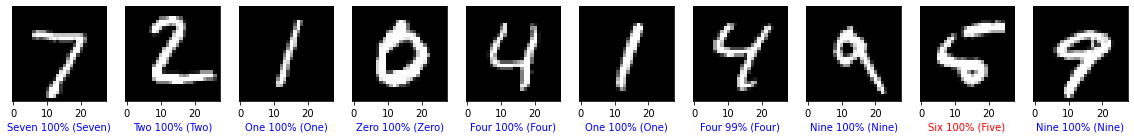

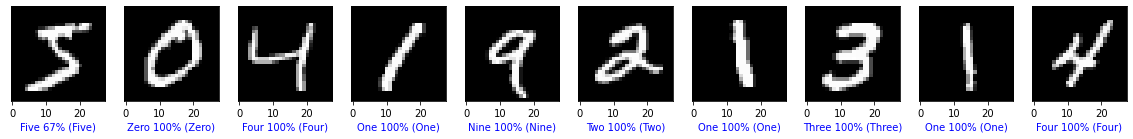

In [24]:
class_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']


def display_images(images, predicted_labels, true_labels):
  '''
  Display the images in an orderly way that associates it with its predicted and true labels.
  :images: the input images
  :predicted_labels: the predicted labels from the model
  :true_labels: the correct labels
  '''
  n = 10  # How many digits we will display
  plt.figure(figsize=(20, 4))
  for i in range(n):
      # Display original
      ax = plt.subplot(2, n, i + 1)
      plt.imshow(images[i].reshape(28, 28))
      plt.gray()
      ax.get_yaxis().set_visible(False)

      predicted_label = np.argmax(predicted_labels[i])

      if predicted_label == true_labels[i]:
        color = 'blue'
      else:
        color = 'red'

      plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predicted_labels[i]),
                                    class_names[true_labels[i]]),
                                    color=color)


  plt.show()

display_images(x_test, test_predictions, y_test)
display_images(x_train, train_predictions, y_train)